# Fasion MNIST - CNN ver 2
- 2 x Conv2D layers with padding
- MaxPooling2D layer
- 1 Dropout(0.25) layer
- 1 FCN layer
- 1 Dropout(0.5) layer
- 1 Output layer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) =  fashion_mnist.load_data() # 데이터 자체에 튜플형식으로 들어가 있음 

X_train.shape, X_test.shape, y_train.shape, y_test.shape

4431872/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [3]:
# X_train, X_test: 정규화(0~1)
# 이미지 차원 변경 
X_train = X_train.reshape(-1, 28,28,1) / 225.
X_test = X_test.reshape(-1, 28,28,1) / 225.

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [4]:
# Y_train, Y_test: one-hot encodig
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

2. 모델 정의/설정/학습/평가

In [5]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [8]:
model = Sequential([
                    Conv2D(32, kernel_size=(3,3), padding='same', input_shape=(28,28,1), activation='relu'),
                    Conv2D(64, (3,3), padding='same', activation='relu'),
                    MaxPooling2D(),                       # MaxPooling2D(pool_size=(2,2))
                    Dropout(0.25),
                    Flatten(),                            # ----> 1 차원 변경 
                    Dense(512, activation='relu'),
                    Dropout(0.5),
                    Dense(10, activation='softmax')       # feature col num = 10 이여서 

])
model.summary()
# padding -> 파라미더 개수 줄어들지 않음!

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 12544)             0         
                                                                 
 dense_4 (Dense)             (None, 512)               6423040   
                                                      

In [9]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

model_path = 'best-fasion-mnist-cnn-v2.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=10) 

In [10]:
hist = model.fit(
    X_train, Y_train, validation_split=0.2,
    epochs=100, batch_size=200,
    callbacks=[mc,es]
)
# flatten -> FCN 넘어갈 때 파라미터 수 많아져서 일반 cpu로 돌리면 시간 너무 오래걸림!
# 학습시에 GPU로 변경 후 실행하기 

Epoch 1/100
240/240 [==============================] - ETA: 0s - loss: 0.4595 - accuracy: 0.8380
Epoch 1: val_loss improved from inf to 0.29751, saving model to best-fasion-mnist-cnn-v1.h5
240/240 [==============================] - 16s 19ms/step - loss: 0.4595 - accuracy: 0.8380 - val_loss: 0.2975 - val_accuracy: 0.8892
Epoch 2/100
240/240 [==============================] - ETA: 0s - loss: 0.2859 - accuracy: 0.8970
Epoch 2: val_loss improved from 0.29751 to 0.25910, saving model to best-fasion-mnist-cnn-v1.h5
240/240 [==============================] - 4s 17ms/step - loss: 0.2859 - accuracy: 0.8970 - val_loss: 0.2591 - val_accuracy: 0.9057
Epoch 3/100
237/240 [============================>.] - ETA: 0s - loss: 0.2344 - accuracy: 0.9148
Epoch 3: val_loss improved from 0.25910 to 0.22289, saving model to best-fasion-mnist-cnn-v1.h5
240/240 [==============================] - 4s 18ms/step - loss: 0.2349 - accuracy: 0.9147 - val_loss: 0.2229 - val_accuracy: 0.9164
Epoch 4/100
237/240 [=======

In [11]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.2191 - accuracy: 0.9281


[0.21912306547164917, 0.9280999898910522]

3. 학습 과정 시각화

In [13]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs =np.arange(1, len(y_acc)+1) # 시작을 1번부터 해주기 위해서

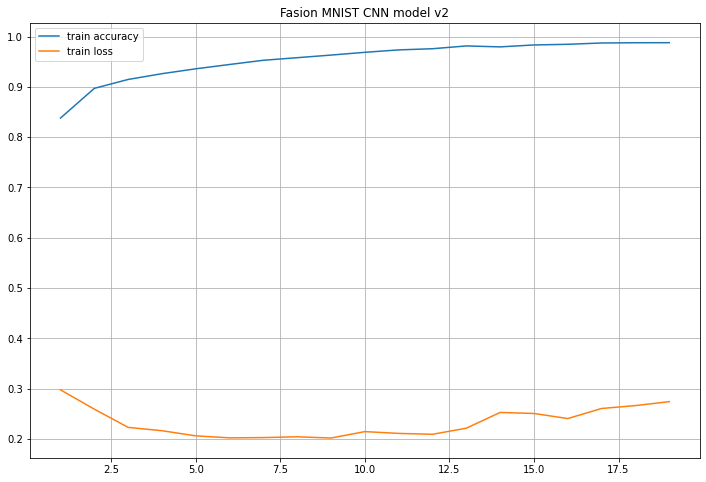

In [14]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='train loss')
plt.legend(), plt.grid()
plt.title('Fasion MNIST CNN model v2')
plt.show()